<a href="https://colab.research.google.com/github/tanyagupta1/Machine-Learning/blob/main/BTP/interactive_vs_therapy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving interactive.csv to interactive.csv


In [ ]:
import pandas as pd
import pandas_profiling as pp
import os

In [ ]:
path = "/content/drive/MyDrive/BTP Data/labelled/"
folders = ["drugs_emo_posts","comments_emotion"]

posts = pd.DataFrame()
shapes = []
for i in range(1):
  for filename in os.listdir(path+folders[i]):
      cpath = path+folders[i]
      f = os.path.join(cpath, filename)
      if os.path.isfile(f):
          temp = pd.read_csv(f)
          shapes.append(temp.shape[0])
          posts = pd.concat([posts,temp])

posts.shape

(10118, 13)

In [ ]:
posts=posts.drop(columns='Unnamed: 0')
posts['body'].fillna("",inplace=True)

In [ ]:
posts

In [ ]:
comments = pd.DataFrame()
for filename in os.listdir(path+folders[1]):
      cpath = path+folders[1]
      f = os.path.join(cpath, filename)
      if os.path.isfile(f):
          temp = pd.read_csv(f)
          shapes.append(temp.shape[0])
          comments = pd.concat([comments,temp])

In [ ]:
len(comments)

59342

In [ ]:
interactive_ids = list(pd.read_csv('interactive.csv')['sub_id'])

In [ ]:
interactive_posts = posts.query('sub_id in @interactive_ids')

In [ ]:
len(interactive_posts)

4398

In [ ]:
comments=comments.drop(columns='Unnamed: 0')
comments['body'].fillna("",inplace=True)

In [ ]:
interactive_comments = comments.query('post_id in @interactive_ids')

In [ ]:
len(interactive_comments)

45159

In [ ]:
interactive_posts['body_len']=interactive_posts['body'].str.split().str.len()
interactive_posts['title_len']=interactive_posts['title'].str.split().str.len()
interactive_comments['body_len']=interactive_comments['body'].str.split().str.len()

In [ ]:
def combine(id, title, body):
  post_com = interactive_comments.query('post_id==@id')
  sum_com = post_com['body_len'].sum()
  return title+body+sum_com

In [ ]:
interactive_posts['total_len'] = interactive_posts.apply(lambda x: combine(x.sub_id,x.title_len, x.body_len), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
interactive_posts['body_len'].mean()

189.9549795361528

In [ ]:
!pip3 install pandas_profiling --upgrade

In [ ]:
post_df = pd.read_csv("/content/drive/MyDrive/BTP Data/Tanya_HOPE_Annotated/hope_emotion_type.csv")

In [ ]:
post_df = post_df.drop(columns = "Unnamed: 0" )

In [ ]:
post_report = pp.ProfileReport(post_df)
post_report.to_file("Hope_emotions.html")

In [ ]:
post_df

,Utterance,conv_id,body_len,primary_emotion,secondary_emotion,speaker
0,You okay now kind of taking a look at some of ...,0,142,approval,sadness,T
1,I like my job because I felt like I was helpin...,0,98,joy,realization,P
2,So you remember accomplishing things at that j...,0,17,neutral,neutral,T
3,"Yeah, I feel like, you know, doing my job, I g...",0,76,approval,fear,P
4,You kept people safe. And you had a lot of sat...,0,22,curiosity,approval,T
...,...,...,...,...,...,...
11532,I don't know.,190,3,confusion,confusion,P
11533,I really need you to tell me that you're going...,190,17,curiosity,curiosity,T
11534,I'll go look at all those things. And I'll fin...,190,25,optimism,optimism,P
11535,"Okay, well, I think you really need to think a...",190,24,approval,approval,T


In [ ]:
utt_lengths =[]
for i in range(191):
  utt_lengths.append(len(post_df[post_df.conv_id==i]))

In [ ]:
utt_lengths

In [ ]:
first=[]
last=[]
for i in range(191):
  patient_ut= post_df[(post_df['conv_id']==i) & (post_df['speaker']=='P')]
  patient_ut=patient_ut.reset_index(drop=True)
  print(patient_ut)
  if(len(patient_ut)<2):
    continue
  first.append(patient_ut.iloc[0]['primary_emotion'])

  last.append(patient_ut.iloc[-1]['primary_emotion'])

Streaming output truncated to the last 5000 lines.
9      nervousness       nervousness       P  
10     realization          approval       P  
11     nervousness       nervousness       P  
12     disapproval       disapproval       P  
13        surprise          surprise       P  
14        approval          approval       P  
15     realization       realization       P  
16         sadness           sadness       P  
17         neutral           neutral       P  
18       confusion         confusion       P  
19     disapproval       disapproval       P  
20        approval          approval       P  
21     disapproval       disapproval       P  
22         neutral           neutral       P  
23       curiosity         curiosity       P  
24            fear              fear       P  
25     nervousness       nervousness       P  
26     disapproval       disapproval       P  
27        approval          approval       P  
28        approval          approval       P  
29     di

In [ ]:
transition_frequency={}
for i in range(191):
  if(first[i] in transition_frequency.keys()):
    if(last[i] in transition_frequency[first[i]].keys()):
      transition_frequency[first[i]][last[i]]+=1
    else:
      transition_frequency[first[i]][last[i]]=1
  else:
    transition_frequency[first[i]]={}
    transition_frequency[first[i]][last[i]]=1


In [ ]:
for i in transition_frequency.keys():
  print(i)
  print(sorted(transition_frequency[i].items(), key=lambda x: x[1],reverse=True))

joy
[('approval', 4), ('gratitude', 2), ('joy', 1)]
curiosity
[('gratitude', 4), ('neutral', 1), ('approval', 1), ('optimism', 1)]
disapproval
[('gratitude', 2), ('approval', 2), ('curiosity', 1)]
approval
[('approval', 28), ('gratitude', 24), ('neutral', 6), ('realization', 2), ('disapproval', 2), ('sadness', 2), ('caring', 2), ('desire', 1), ('curiosity', 1), ('annoyance', 1), ('excitement', 1)]
neutral
[('approval', 8), ('gratitude', 7), ('realization', 1), ('confusion', 1), ('neutral', 1), ('anger', 1), ('optimism', 1)]
nervousness
[('gratitude', 3), ('approval', 2)]
anger
[('approval', 1)]
admiration
[('approval', 7), ('gratitude', 4), ('disapproval', 1), ('neutral', 1)]
caring
[('gratitude', 11), ('approval', 2)]
sadness
[('approval', 5), ('gratitude', 1), ('curiosity', 1), ('realization', 1)]
gratitude
[('gratitude', 5), ('approval', 2), ('neutral', 1), ('love', 1)]
optimism
[('gratitude', 4), ('approval', 1), ('annoyance', 1)]
relief
[('gratitude', 3), ('approval', 2), ('embarr

In [ ]:
op_comments = interactive_comments[interactive_comments['is_op']==True]

In [ ]:
len(op_comments)

12703

In [ ]:
posts

In [ ]:
first=[]
last=[]
for i in interactive_ids:
  tmp_op = op_comments[op_comments['post_id']==i]
  if(len(tmp_op)>1):
    print(len(tmp_op))
    tmp_op = tmp_op.sort_values('created')
    # print(list(tmp_op['created']))
    emotions = list(tmp_op['primary_emotion'])
    # print(emotions[0],"--",emotions[-1])
    first.extend(list(posts[posts['sub_id']==i]['primary_emotion']))
    print()
    # first.append(emotions[0])
    last.append(emotions[-1])

In [ ]:
print(len(first),' ',len(last))

2529   2529


In [ ]:
transition_frequency={}
for i in range(len(first)):
  if(first[i] in transition_frequency.keys()):
    if(last[i] in transition_frequency[first[i]].keys()):
      transition_frequency[first[i]][last[i]]+=1
    else:
      transition_frequency[first[i]][last[i]]=1
  else:
    transition_frequency[first[i]]={}
    transition_frequency[first[i]][last[i]]=1

In [ ]:
for i in transition_frequency.keys():
  print(i)
  print(sorted(transition_frequency[i].items(), key=lambda x: x[1],reverse=True))

removed chitchat and survey

In [ ]:
help_rant = pd.read_csv('help_rant.csv')
help_rant_ids = set(help_rant['sub_id'])

In [ ]:
interactive_help_rant = set(interactive_ids).intersection(help_rant_ids)

In [ ]:
len(interactive_help_rant)

3405

In [ ]:
interactive_hr_posts = posts.query('sub_id in @interactive_help_rant')

In [ ]:
interactive_hr_comments = comments.query('post_id in @interactive_help_rant')

In [ ]:
posts

In [ ]:
op_hr_comments = interactive_hr_comments[interactive_hr_comments['is_op']==True]

In [ ]:
op_hr_comments

In [ ]:
first=[]
last=[]
for i in interactive_help_rant:
  tmp_op = op_hr_comments[op_hr_comments['post_id']==i]
  tmp_op = tmp_op.sort_values('created')
  emotions = list(tmp_op['primary_emotion'])
  print(tmp_op.iloc[-1]['body'])
  first.extend(list(interactive_hr_posts[interactive_hr_posts['sub_id']==i]['primary_emotion']))
  last.append(emotions[-1])

In [ ]:
transition_frequency={}
for i in range(len(first)):
  if(first[i] in transition_frequency.keys()):
    if(last[i] in transition_frequency[first[i]].keys()):
      transition_frequency[first[i]][last[i]]+=1
    else:
      transition_frequency[first[i]][last[i]]=1
  else:
    transition_frequency[first[i]]={}
    transition_frequency[first[i]][last[i]]=1
for i in transition_frequency.keys():
  print(i)
  print(sorted(transition_frequency[i].items(), key=lambda x: x[1],reverse=True))

disgust
[('gratitude', 17), ('neutral', 8), ('approval', 8), ('caring', 4), ('sadness', 4), ('realization', 4), (nan, 2), ('amusement', 2), ('fear', 2), ('disgust', 2), ('disappointment', 1), ('joy', 1), ('disapproval', 1), ('desire', 1), ('anger', 1), ('curiosity', 1), ('surprise', 1), ('annoyance', 1)]
confusion
[('gratitude', 80), ('approval', 27), ('confusion', 17), ('realization', 14), ('neutral', 13), (nan, 11), ('fear', 9), ('amusement', 8), ('admiration', 7), ('joy', 7), ('optimism', 7), ('caring', 6), ('sadness', 6), ('disapproval', 5), ('embarrassment', 5), ('curiosity', 4), ('nervousness', 3), ('disgust', 3), ('love', 3), ('excitement', 2), ('remorse', 2), ('relief', 2), ('desire', 2), ('surprise', 2), ('disappointment', 2), ('anger', 1)]
anger
[('gratitude', 93), ('approval', 26), ('neutral', 22), ('realization', 21), ('anger', 20), ('admiration', 14), ('sadness', 13), ('amusement', 11), ('confusion', 9), ('joy', 8), ('fear', 7), ('disapproval', 7), (nan, 7), ('disappointme

non op comments vs therapist utterances

In [ ]:
nonop_hr_comments = interactive_hr_comments[interactive_hr_comments['is_op']==False]

In [ ]:
reddit_peer = list(nonop_hr_comments['primary_emotion'])

In [ ]:
therapist=[]
for i in range(191):
  therapist.extend(list(post_df[(post_df['conv_id']==i) & (post_df['speaker']=='T')]['primary_emotion']))
  

In [ ]:
therapist

In [ ]:
reddit_peer

In [ ]:
ther_d={}
red_d={}
for i in therapist:
  if(i in ther_d.keys()):
    ther_d[i]+=1
  else:
    ther_d[i]=1
for i in reddit_peer:
  if(i in red_d.keys()):
    red_d[i]+=1
  else:
    red_d[i]=1

In [ ]:
factor=1.0/sum(ther_d.values())
for k in ther_d:
  ther_d[k] = ther_d[k]*factor*100

In [ ]:
sorted(ther_d.items(), key=lambda x: x[1],reverse=True)

[('curiosity', 33.29893360853113),
 ('approval', 19.986240110079116),
 ('neutral', 18.833849329205364),
 ('caring', 5.641554867561059),
 ('realization', 3.130374957000344),
 ('gratitude', 2.6143790849673203),
 ('confusion', 2.2703818369453046),
 ('admiration', 1.9951840385276916),
 ('disapproval', 1.8919848641210868),
 ('fear', 1.3587891296869623),
 ('optimism', 1.3243894048847609),
 ('nervousness', 1.2211902304781561),
 ('joy', 1.066391468868249),
 ('sadness', 0.9287925696594427),
 ('excitement', 0.7051943584451323),
 ('anger', 0.6019951840385277),
 ('surprise', 0.5675954592363261),
 ('disappointment', 0.48159614723082217),
 ('disgust', 0.48159614723082217),
 ('annoyance', 0.4471964224286205),
 ('love', 0.29239766081871343),
 ('remorse', 0.2579979360165119),
 ('embarrassment', 0.1719986240110079),
 ('desire', 0.1547987616099071),
 ('relief', 0.10319917440660474),
 ('pride', 0.08599931200550395),
 ('amusement', 0.06879944960440317),
 ('grief', 0.01719986240110079)]

In [ ]:
factor=1.0/sum(red_d.values())
for k in red_d:
  red_d[k] = red_d[k]*factor*100

In [ ]:
sorted(red_d.items(), key=lambda x: x[1],reverse=True)

[('caring', 15.93540799710512),
 ('approval', 12.583680115795188),
 (nan, 12.031843676497196),
 ('neutral', 10.426090103130088),
 ('realization', 6.997466980278633),
 ('curiosity', 5.771666365116699),
 ('optimism', 4.99366745069658),
 ('disapproval', 3.283879138773295),
 ('gratitude', 3.0215306676316263),
 ('sadness', 2.7908449430070563),
 ('admiration', 2.7682286954948436),
 ('anger', 2.650624208431337),
 ('joy', 2.144020264157771),
 ('fear', 1.9630902840600688),
 ('confusion', 1.8952415415234305),
 ('amusement', 1.5695675773475664),
 ('disgust', 1.4293468427718474),
 ('love', 1.361498100235209),
 ('annoyance', 1.2981726072010134),
 ('remorse', 0.9001266509860684),
 ('disappointment', 0.8277546589469876),
 ('surprise', 0.7779989144201195),
 ('nervousness', 0.6784874253663832),
 ('excitement', 0.5744526868102044),
 ('desire', 0.5156504432784512),
 ('embarrassment', 0.23520897412701286),
 ('pride', 0.23520897412701286),
 ('relief', 0.21259272661480008),
 ('grief', 0.12665098606839154)]

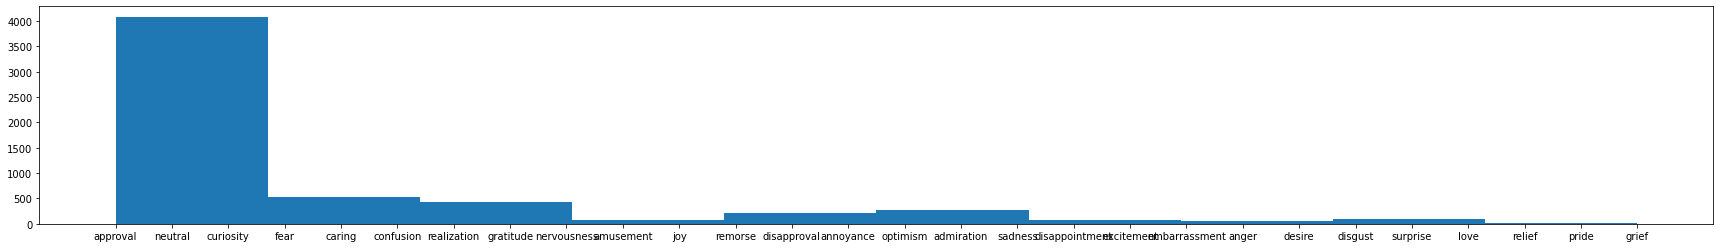

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
f = plt.figure()
f.set_figwidth(30)
plt.hist(therapist)
plt.show()

op comments vs patient utterances

In [ ]:
patient=[]
for i in range(191):
  patient.extend(list(post_df[(post_df['conv_id']==i) & (post_df['speaker']=='P')]['primary_emotion']))

In [ ]:
reddit_op =list(op_hr_comments['primary_emotion'])

In [ ]:
ther_d={}
red_d={}
for i in patient:
  if(i in ther_d.keys()):
    ther_d[i]+=1
  else:
    ther_d[i]=1
for i in reddit_op:
  if(i in red_d.keys()):
    red_d[i]+=1
  else:
    red_d[i]=1
for i in list(interactive_hr_posts['primary_emotion']):
  if(i in red_d.keys()):
    red_d[i]+=1
  else:
    red_d[i]=1

In [ ]:
sorted(ther_d.items(), key=lambda x: x[1],reverse=True)

[('approval', 2277),
 ('neutral', 999),
 ('disapproval', 473),
 ('realization', 314),
 ('confusion', 199),
 ('curiosity', 139),
 ('sadness', 135),
 ('nervousness', 115),
 ('gratitude', 110),
 ('joy', 108),
 ('disappointment', 103),
 ('admiration', 97),
 ('fear', 96),
 ('optimism', 86),
 ('excitement', 61),
 ('caring', 54),
 ('anger', 51),
 ('annoyance', 49),
 ('love', 48),
 ('surprise', 43),
 ('desire', 40),
 ('disgust', 39),
 ('embarrassment', 25),
 ('relief', 24),
 ('amusement', 16),
 ('remorse', 12),
 ('pride', 8),
 ('grief', 1)]

In [ ]:
factor=1.0/sum(ther_d.values())
for k in ther_d:
  ther_d[k] = ther_d[k]*factor*100

In [ ]:
sorted(ther_d.items(), key=lambda x: x[1],reverse=True)

[('approval', 39.79377839916111),
 ('neutral', 17.458930443900726),
 ('disapproval', 8.266340440405449),
 ('realization', 5.487591751135964),
 ('confusion', 3.477804963299544),
 ('curiosity', 2.429220552254456),
 ('sadness', 2.35931492485145),
 ('nervousness', 2.0097867878364197),
 ('gratitude', 1.9224047535826627),
 ('joy', 1.8874519398811598),
 ('disappointment', 1.8000699056274025),
 ('admiration', 1.6952114645228933),
 ('fear', 1.6777350576721417),
 ('optimism', 1.502970989164627),
 ('excitement', 1.0660608178958402),
 ('caring', 0.9437259699405799),
 ('anger', 0.8912967493883253),
 ('annoyance', 0.8563439356868223),
 ('love', 0.8388675288360709),
 ('surprise', 0.7514854945823135),
 ('desire', 0.6990562740300592),
 ('disgust', 0.6815798671793077),
 ('embarrassment', 0.4369101712687869),
 ('relief', 0.4194337644180354),
 ('amusement', 0.2796225096120236),
 ('remorse', 0.2097168822090177),
 ('pride', 0.1398112548060118),
 ('grief', 0.017476406850751476)]

In [ ]:
factor=1.0/sum(red_d.values())
for k in ther_d:
  red_d[k] = red_d[k]*factor*100

In [ ]:
sorted(red_d.items(), key=lambda x: x[1],reverse=True)

[(nan, 790),
 ('gratitude', 19.651798782836455),
 ('approval', 10.430629381403591),
 ('realization', 7.9654880209537025),
 ('sadness', 7.341499114089824),
 ('curiosity', 5.384793159232725),
 ('neutral', 5.253832524458825),
 ('confusion', 4.421847315306987),
 ('anger', 4.144518912256375),
 ('fear', 3.89030120945998),
 ('disapproval', 2.7039519297434715),
 ('admiration', 2.6654340959864418),
 ('optimism', 2.634619828980818),
 ('caring', 2.2956628919189583),
 ('amusement', 2.018334488868346),
 ('disappointment', 1.8103381865803867),
 ('joy', 1.7255989523149218),
 ('disgust', 1.3019027809875972),
 ('annoyance', 1.2941992142361913),
 ('love', 1.2787920807333797),
 ('nervousness', 1.2556813804791618),
 ('desire', 1.1401278792080733),
 ('surprise', 0.7549495416377783),
 ('remorse', 0.7318388413835606),
 ('excitement', 0.6779138741237193),
 ('embarrassment', 0.6470996071180957),
 ('relief', 0.28503196980201834),
 ('pride', 0.12325706802249442),
 ('grief', 0.08473923426546491)]